In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from backend import *

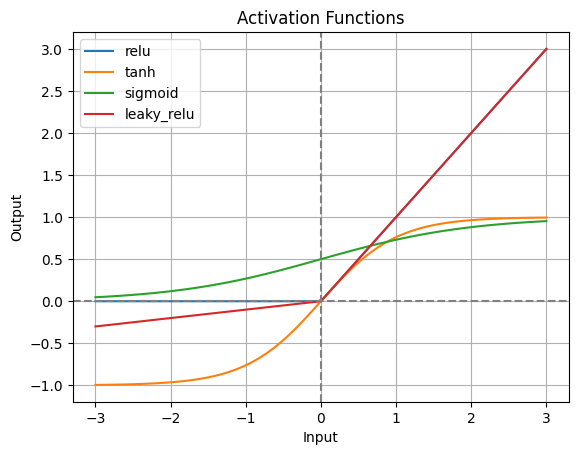

In [2]:
linspace = np.linspace(-3, 3, 100)
for fn in (relu, tanh, sigmoid, leaky_relu):
    plt.plot(linspace, [fn(x) for x in linspace], label=fn.__name__)

plt.axvline(0, color="gray", linestyle="--")
plt.axhline(0, color="gray", linestyle="--")

plt.legend()
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()


In [50]:
model = Model(
    [
        InputLayer(2, relu),
        FullyConnectedLayer(4, tanh),
        FullyConnectedLayer(5, sigmoid),
        FullyConnectedLayer(10, sigmoid),
        OutputLayer(3, relu),

    ]
)
model

Model with layers: [InputLayer (2 --> 4), FullyConnectedLayer (4 --> 5), FullyConnectedLayer (5 --> 10), FullyConnectedLayer (10 --> 3), OutputLayer (3 --> None)]

In [56]:
model.forward([1, 2])

[1388.1665133326862, 905.6078057582919, 1102.8607530906745]

In [5]:
def load_dataset(path):
    df = pd.read_csv(path)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
    x = df[["Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].fillna(-99).to_numpy()
    y = df["Survived"].to_numpy()
    return x, y

x_train, y_train = load_dataset("train.csv")